In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from Index_Calculations import facility_index_gen, index_and_generation
import os
import glob
import numpy as np

## Import EIA-860 data

In [2]:
path = os.path.join('Data storage', 'EIA-860 2015', '2___Plant_Y2015.xlsx')
eia_860_plant = pd.read_excel(path, skiprows=1)

In [3]:
eia_860_plant.head()

,Utility ID,Utility Name,Plant Code,Plant Name,Street Address,City,State,Zip,County,Latitude,...,Ash Impoundment?,Ash Impoundment Lined?,Ash Impoundment Status,Transmission or Distribution System Owner,Transmission or Distribution System Owner ID,Transmission or Distribution System Owner State,Grid Voltage (kV),Grid Voltage 2 (kV),Grid Voltage 3 (kV),Natural Gas Pipeline Name
0,195,Alabama Power Co,2,Bankhead Dam,19001 Lock 17 Road,Northport,AL,35476,Tuscaloosa,33.4587,...,N,X,NaN,Alabama Power Co,195,AL,115,,,NaN
1,195,Alabama Power Co,3,Barry,North Highway 43,Bucks,AL,36512,Mobile,31.0069,...,Y,N,OP,Alabama Power Co,195,AL,230,,,Bay Gas
2,195,Alabama Power Co,4,Walter Bouldin Dam,750 Bouldin Dam Road,Wetumpka,AL,36092,Elmore,32.5839,...,N,X,NaN,Alabama Power Co,195,AL,115,,,NaN
3,195,Alabama Power Co,7,Gadsden,1000 Goodyear Ave,Gadsden,AL,35903,Etowah,34.0128,...,Y,N,OP,Alabama Power Co,195,AL,115,,,Southern Natural Gas
4,195,Alabama Power Co,8,Gorgas,460 Gorgas Road,Parrish,AL,35580,Walker,33.6443,...,Y,N,OP,Alabama Power Co,195,AL,230,,,NaN


In [4]:
eia_860_plant = eia_860_plant.loc[:, ['Plant Code', 'NERC Region']]

eia_860_plant.rename(columns={'NERC Region': 'region',
                              'Plant Code': 'plant id'}, inplace=True)

In [34]:
eia_860_plant.head()

,plant id,region
0,2,SERC
1,3,SERC
2,4,SERC
3,7,SERC
4,8,SERC


In [49]:
path = os.path.join('Data storage', 'Facility NERC labels.csv')
eia_860_plant.to_csv(path, index=False)

In [81]:
'USA-FL'[-2:]

'FL'

In [35]:
path = os.path.join('Data storage', 'Facility gen fuels and CO2 2017-05-25.zip')
df = pd.read_csv(path)
df.head()

,f,fuel,month,plant id,total fuel (mmbtu),year,generation (MWh),elec fuel (mmbtu),geography,last_updated,lat,lon,prime mover,datetime,quarter,all fuel fossil CO2 (kg),elec fuel fossil CO2 (kg),all fuel total CO2 (kg),elec fuel total CO2 (kg)
0,M,NG,3,10275,0.0,2017,0.0,0.0,USA-FL,2017-05-24T14:26:30-04:00,27.9114,-81.6006,ALL,2017-03-01,1,0.0,0.0,0.0,0.0
1,M,NG,2,10275,0.0,2017,0.0,0.0,USA-FL,2017-05-24T14:26:30-04:00,27.9114,-81.6006,ALL,2017-02-01,1,0.0,0.0,0.0,0.0
2,M,NG,1,10275,0.0,2017,0.0,0.0,USA-FL,2017-05-24T14:26:30-04:00,27.9114,-81.6006,ALL,2017-01-01,1,0.0,0.0,0.0,0.0
3,M,NG,12,10275,0.0,2016,0.0,0.0,USA-FL,2017-05-24T14:26:30-04:00,27.9114,-81.6006,ALL,2016-12-01,4,0.0,0.0,0.0,0.0
4,M,NG,11,10275,0.0,2016,0.0,0.0,USA-FL,2017-05-24T14:26:30-04:00,27.9114,-81.6006,ALL,2016-11-01,4,0.0,0.0,0.0,0.0


In [40]:
df = pd.merge(df, eia_860_plant, on='plant id', how='left')

In [48]:
for year in df['year'].unique():
    temp = df.loc[df['year'] == year]
    total_gen = temp['generation (MWh)'].sum()
    not_counted_gen = temp.loc[temp['region'].isnull(), 'generation (MWh)'].sum()
    percent_out = not_counted_gen / total_gen * 100
    print 'In {}, {:.1f}% of gen is missed'.format(year, percent_out) 

In 2017, 0.3% of gen is missed
In 2016, 0.0% of gen is missed
In 2015, 0.0% of gen is missed
In 2014, 0.2% of gen is missed
In 2013, 0.3% of gen is missed
In 2012, 0.4% of gen is missed
In 2011, 0.6% of gen is missed
In 2010, 0.7% of gen is missed
In 2009, 0.7% of gen is missed
In 2008, 0.8% of gen is missed
In 2007, 0.9% of gen is missed
In 2006, 0.9% of gen is missed
In 2005, 1.0% of gen is missed
In 2004, 1.1% of gen is missed
In 2003, 1.3% of gen is missed
In 2002, 1.4% of gen is missed
In 2001, 1.4% of gen is missed


## Group state-level total gen into approx NERC regions

In [23]:
states_in_NERC = {'WECC': ['WA', 'OR', 'CA', 'NV', 'AZ', 'UT',
                           'ID', 'MT', 'WY', 'CO', 'NM'],
                  'MRO': ['ND', 'SD', 'NE', 'MN', 'IA', 'WI'],
                  'SPP': ['KS', 'OK'],
                  'ERCOT': ['TX'],
                  'SERC': ['MO', 'IL', 'AR', 'LA', 'MS', 'AL',
                           'GA', 'SC', 'NC', 'TN'],
                  'FRCC': ['FL'],
                  'RFC': ['MI', 'IN', 'OH', 'PA', 'WV', 'KY',
                          'VA', 'NJ', 'DE', 'MD'],
                  'NPCC': ['NY', 'VT', 'ME', 'NH', 'MA', 'RI', 'CT']}

In [24]:
for nerc, states in states_in_NERC.iteritems():
    paths = [os.path.join('Data storage', 
                          'state gen data', 
                          state + ' fuels gen.csv') for state in states]
    nerc_list = [pd.read_csv(path) for path in paths]
    nerc_df = pd.concat(nerc_list)
    nerc_df.reset_index(inplace=True, drop=True)
    
    path_out = os.path.join('Data storage', 'state gen data', nerc + ' fuels gen.csv')
    nerc_df.to_csv(path_out, index=False)

## Calculate index values for each NERC region

In [25]:
facility_path = os.path.join('Data storage', 'Facility gen fuels and CO2 2017-05-25.zip')
epa_path = os.path.join('Data storage', 'Monthly EPA emissions 2017-05-25.csv')
ef_path = os.path.join('Data storage', 'Final emission factors.csv')
out_folder = os.path.join('Data storage', 'final NERC data from states')
NERC_path = os.path.join('Data storage', 'Facility NERC labels.csv')

for nerc in states_in_NERC.keys():
    all_fuel_path = os.path.join('Data storage', 'state gen data', nerc + ' fuels gen.csv')
    index_and_generation(facility_path=facility_path,
                         all_fuel_path = all_fuel_path,
                         epa_path=epa_path,
                         emission_factor_path=ef_path,
                         export_folder=out_folder, export_path_ext=' '
                         + nerc, state=states_in_NERC[nerc])

## Read data and create figures

In [26]:
path = os.path.join('Data storage', 'final NERC data from states', 'Monthly index*')
mi_fns = glob.glob(path)
path = os.path.join('Data storage', 'final NERC data from states', 'Monthly gen*')
mg_fns = glob.glob(path)

In [27]:
df_list = []
for f in mi_fns:
    region = f.split()[-1][:-4]
    df = pd.read_csv(f)
    df['region'] = region
    df_list.append(df)
full_mi = pd.concat(df_list)
full_mi.reset_index(inplace=True, drop=True)
full_mi.rename(columns={'index (g/kWh)': 'monthly index (g/kWh)'}, inplace=True)
full_mi['datetime'] = pd.to_datetime(full_mi['datetime'])

In [28]:
df_list = []
for f in mg_fns:
    region = f.split()[-1][:-4]
    df = pd.read_csv(f)
    df['region'] = region
    df_list.append(df)
full_mg = pd.concat(df_list)
full_mg.reset_index(inplace=True, drop=True)
full_mg['datetime'] = pd.to_datetime(full_mg['datetime'])

monthly_gen = pd.pivot_table(full_mg, index=['region', 'datetime'], 
                             values='generation (MWh)', columns='fuel category 1')
monthly_gen.reset_index(inplace=True, drop=False)
monthly_gen['Year'] = monthly_gen['datetime'].dt.year
monthly_gen.replace(np.nan, 0, inplace=True)

In [29]:
gen_index = pd.merge(monthly_gen, full_mi[['datetime', 'region', 'monthly index (g/kWh)']], 
                     on=['datetime', 'region'])

In [30]:
for region in gen_index['region'].unique():
    gen_index.loc[gen_index['region'] == region, 'Index variability'] = \
        gen_index.loc[gen_index['region']==region, 
                       'monthly index (g/kWh)'].rolling(window=12).std()
    
    gen_index.loc[gen_index['region'] == region, 
                   'Normalized Index variability'] = \
         gen_index.loc[gen_index['region']==region, 'Index variability'] / \
         gen_index.loc[gen_index['region']==region, 
                       'monthly index (g/kWh)'].rolling(window=12).mean()


In [32]:
base_year = 2005

In [33]:
fuels = ['Coal', 'Natural Gas', 'Other Renewables', 'Nuclear', 'Other',
         'Solar', 'Wind', 'Hydro']
# fuels = ['Coal', 'Natural Gas', 'Renewables', 'Nuclear', 'Other']
gen_index['Total gen'] = gen_index.loc[:, fuels].sum(axis=1)
for fuel in fuels:
    # New columns that are being added
    col_percent = 'percent ' + fuel
    col_change = 'change in ' + fuel

    # Calculate percent of generation from each fuel type
    gen_index[col_percent] = gen_index.loc[:, fuel] / gen_index.loc[:, 'Total gen']

    # Percent of fuel in region in base year (entire year)
    for region in gen_index['region'].unique():
        percent_fuel_base = gen_index.loc[(gen_index['Year'] == base_year) & 
                                          (gen_index['region'] == region), fuel].sum() / gen_index.loc[(gen_index['Year'] == 2001) & 
                                                                                                     (gen_index['region'] == region), 'Total gen'].sum()

        # Use percent of fuel in 2001 to calculate change for each region/month
        gen_index.loc[gen_index['region'] == region, 
                      col_change] = (gen_index.loc[gen_index['region'] == region, col_percent] - percent_fuel_base) / percent_fuel_base
    
# Change in variability compared to average base year value
for region in gen_index['region'].unique():
    norm_variability_base = gen_index.loc[(gen_index['Year'] == base_year) & 
                                  (gen_index['region'] == region), 'Normalized Index variability'].mean()
    variability_base = gen_index.loc[(gen_index['Year'] == base_year) & 
                                  (gen_index['region'] == region), 'Index variability'].mean()
    
    gen_index.loc[gen_index['region'] == region, 
                  'change in variability'] = (gen_index.loc[gen_index['region'] == region, 
                                                            'Index variability'] - variability_base) / variability_base
    
    gen_index.loc[gen_index['region'] == region, 
                  'change in norm variability'] = (gen_index.loc[gen_index['region'] == region, 
                                                            'Normalized Index variability'] - norm_variability_base) / norm_variability_base

In [14]:
from bokeh.plotting import figure, show, output_notebook, ColumnDataSource
from bokeh.plotting import *
from bokeh.layouts import gridplot
from bokeh.models import HoverTool
from bokeh.palettes import viridis

In [15]:
output_notebook()

Loading BokehJS ...

In [34]:
def weighted_percent(df, fuel, year):
    all_fuels = ['Coal', 'Natural Gas', 'Nuclear', 'Other', 'Other Renewables',
                 'Wind', 'Solar', 'Hydro']
    temp = df.loc[df['Year'] == year, all_fuels]
    temp['Total'] = temp.sum(axis=1)
    
    weighted_per = temp[fuel].sum() / temp['Total'].sum() * 100
    return weighted_per

In [35]:
gen_index.columns

Index([u'region', u'datetime', u'Coal', u'Hydro', u'Natural Gas', u'Nuclear',
       u'Other', u'Other Renewables', u'Solar', u'Wind', u'Year',
       u'monthly index (g/kWh)', u'Index variability',
       u'Normalized Index variability', u'Total gen', u'percent Coal',
       u'change in Coal', u'percent Natural Gas', u'change in Natural Gas',
       u'percent Other Renewables', u'change in Other Renewables',
       u'percent Nuclear', u'change in Nuclear', u'percent Other',
       u'change in Other', u'percent Solar', u'change in Solar',
       u'percent Wind', u'change in Wind', u'percent Hydro',
       u'change in Hydro', u'change in variability',
       u'change in norm variability'],
      dtype='object')

### Actual and Normalized variability over time in each NERC region

At the national level, Index variability went up after 2007, and then dipped back down briefly in 2013. This trend can be seen in a few, but not all, of the regions.

I'm not sure what the cyclical trends in Index variability represent. These values are 12 month rolling standard deviations - they shouldn't be affected by seasonal variation. 
**Update:** Upticks in the variability or normalized variability could be due to one or more months where the Index value jumped up or down well outside the normal range. This would increase the rolling standard deviation for 12 months.

The normalized variability here is a 12 month rolling standard deviation of CO2 intensity divided by the 12 month rolling average. I'm suspicious of the results in MRO.

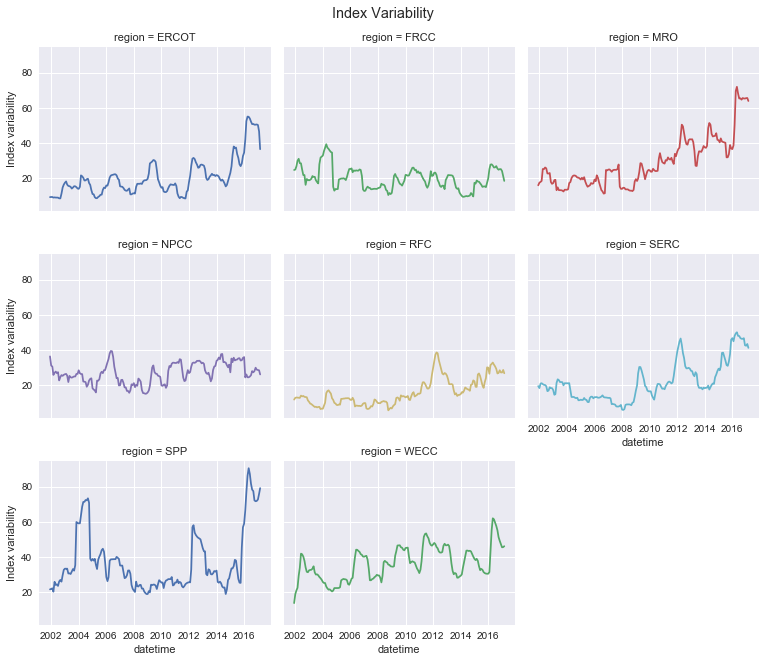

In [36]:
g = sns.FacetGrid(gen_index, col='region', col_wrap=3, hue='region', 
                   aspect = 1.2, palette='deep')
g.map(plt.plot, 'datetime', 'Index variability')
plt.suptitle('Index Variability', y=1.02)

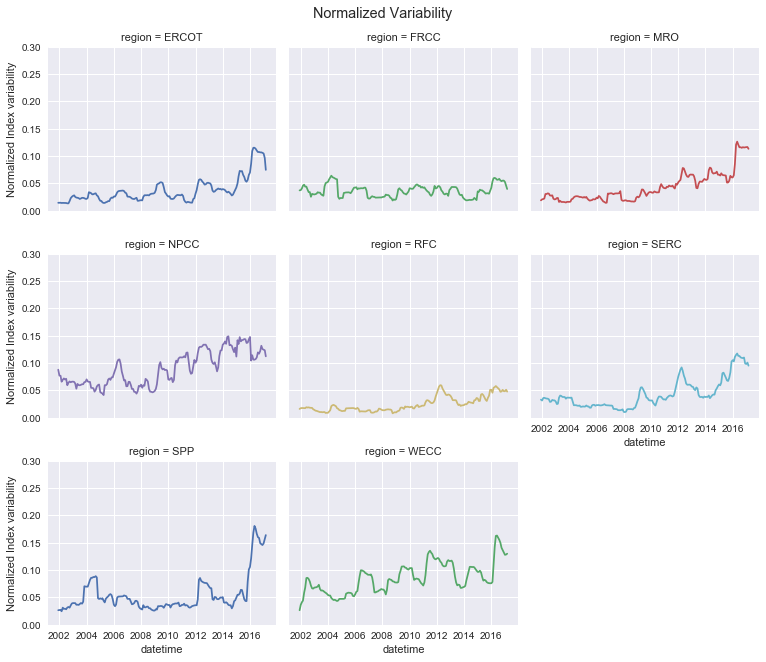

In [37]:
g = sns.FacetGrid(gen_index, col='region', col_wrap=3, hue='region', 
                   aspect = 1.2, palette='deep', ylim=(0, 0.3))
g.map(plt.plot, 'datetime', 'Normalized Index variability')
plt.suptitle('Normalized Variability', y=1.02)

### Actual index values over time in each NERC region

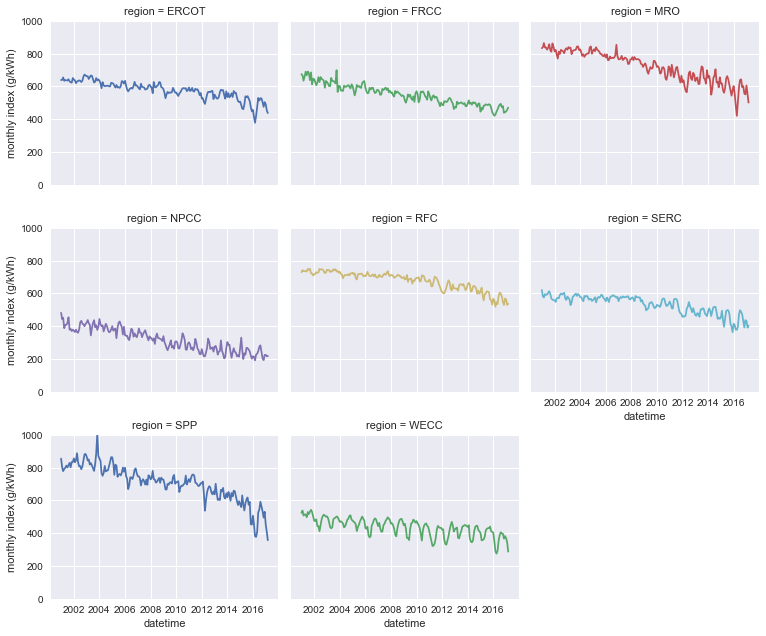

In [38]:
g = sns.FacetGrid(gen_index, col='region', col_wrap=3, hue='region', 
                   aspect = 1.2, palette='deep', ylim=(0,1000))
g.map(plt.plot, 'datetime', 'monthly index (g/kWh)')

### Percent of national generation from each NERC region
This won't be much help until I figure out what's going on with the SERC generation numbers.

In [39]:
nerc_gen = gen_index.pivot(index='datetime', columns='region', values='Total gen')
regions = nerc_gen.columns
nerc_gen['Total'] = nerc_gen.sum(axis=1)
percent_nerc_gen = nerc_gen.iloc[:, :-1].divide(nerc_gen.iloc[:, -1], axis=0)

In [40]:
percent_nerc_gen.reset_index(inplace=True)

In [41]:
percent_nerc_gen = pd.melt(percent_nerc_gen, id_vars='datetime',
                           value_name='Percent Generation')

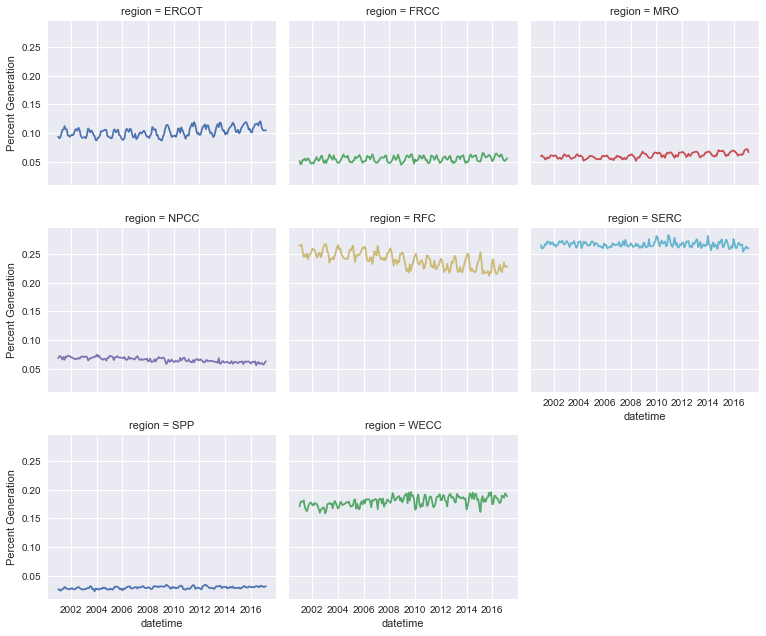

In [42]:
g = sns.FacetGrid(percent_nerc_gen, col='region', col_wrap=3, hue='region', 
                   aspect = 1.2, palette='deep')
g.map(plt.plot, 'datetime', 'Percent Generation')

In [20]:
def region_bokeh_plot(df, fuel, x_axis, y_axis, x_range=None, y_range=None,
                     x_lower_lim=0, x_upper_lim=None):
    figs = {}
    if not x_upper_lim:
        x_upper_lim = df[x_axis].max()
        
    for region in df['region'].unique():
        temp = gen_index.loc[gen_index['region'] == region]
        max_change = temp[x_axis].max()
        
        if max_change <= x_upper_lim and max_change >= x_lower_lim:
            
            source = ColumnDataSource(data=dict(
            x=temp[x_axis],
            y=temp[y_axis],
            datetime=temp['datetime'],
            colors= viridis(len(temp))
            ))
            
            hover = HoverTool(tooltips=[
                                    ("(x,y)", "($x, $y)"),
                                    ("datetime", "@datetime{%F}")],
                             formatters={
                                     'datetime': 'datetime', # use 'datetime' formatter
                                        })
            hover.point_policy = "snap_to_data"

            fuel_2005 = weighted_percent(temp, fuel, 2005)
            fuel_2016 = weighted_percent(temp, fuel, 2016)
            title = region + ' {:.1f}% to {:.1f}% {}'.format(fuel_2005, 
                                                             fuel_2016, fuel)

            figs[region] = figure(title=title, tools=[hover], y_range=y_range, x_range=x_range,
                                 output_backend="webgl")
            figs[region].circle('x', 'y', source=source, color='colors', size=12, alpha=0.5)
            figs[region].xaxis.axis_label = x_axis
            figs[region].yaxis.axis_label = y_axis

    plots = figs.values()
    grid = gridplot(plots, ncols=3, plot_width=240, plot_height=240)

    show(grid, notebook_handle=True)

### Wind
This set of plots - and the ones repeated below - show:
1. The percent generation from wind in a given month against the percent change in normalized variability from a 2005 annual average
2. The percent change in wind generation from 2005 annual average against the percent change in normalized variability from a 2005 annual average

In [43]:
region_bokeh_plot(gen_index, 'Wind', 'percent Wind', 
                  'change in norm variability', 
                  y_range=(-1, 7), x_range=(0, 0.35))

In [44]:
region_bokeh_plot(gen_index, 'Wind', 'change in Wind', 
                  'change in norm variability', y_range=(-1, 7))

### Coal

#### Analysis:
The cleanest relationship that I see is that as coal goes down, variability goes up. The trend is pretty linear, and extends across a bunch of different NERC regions.

In [45]:
region_bokeh_plot(gen_index, 'Coal', 'percent Coal', 
                  'change in norm variability',
                  y_range=(-1, 7), x_range=(0, 0.85))

In [46]:
region_bokeh_plot(gen_index, 'Coal', 'change in Coal', 
                  'change in norm variability', y_range=(-1, 7))

### Natural gas

In [47]:
region_bokeh_plot(gen_index, 'Natural Gas', 'percent Natural Gas', 
                  'change in norm variability',
                  y_range=(-1, 7), x_range=(0, 0.75))

In [48]:
region_bokeh_plot(gen_index, 'Natural Gas', 'change in Natural Gas', 
                  'change in norm variability', y_range=(-1, 7))

### Hydro

In [49]:
region_bokeh_plot(gen_index, 'Hydro', 'percent Hydro', 
                  'change in norm variability',
                  y_range=(-1, 7), x_range=(0, 0.45))

In [50]:
region_bokeh_plot(gen_index, 'Hydro', 'change in Hydro', 
                  'change in norm variability', y_range=(-1, 7))

### Solar

In [51]:
region_bokeh_plot(gen_index, 'Solar', 'percent Solar', 
                  'change in norm variability',
                  y_range=(-1, 7), x_range=(0, 0.08))

In [52]:
region_bokeh_plot(gen_index, 'Solar', 'change in Solar', 
                  'change in norm variability', y_range=(-1, 7))